In [1]:
import numpy as np
import random
import itertools
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def load_audio_file(file_path):
    input_length = 16000
    data = librosa.core.load(file_path)[0] #, sr=16000
    if len(data)>input_length:
        data = data[:input_length]
    else:
        data = np.pad(data, (0, max(0, input_length - len(data))), "constant")
    return data
def plot_time_series(data):
    fig = plt.figure(figsize=(14, 8))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 1, len(data)), data)
    plt.show()

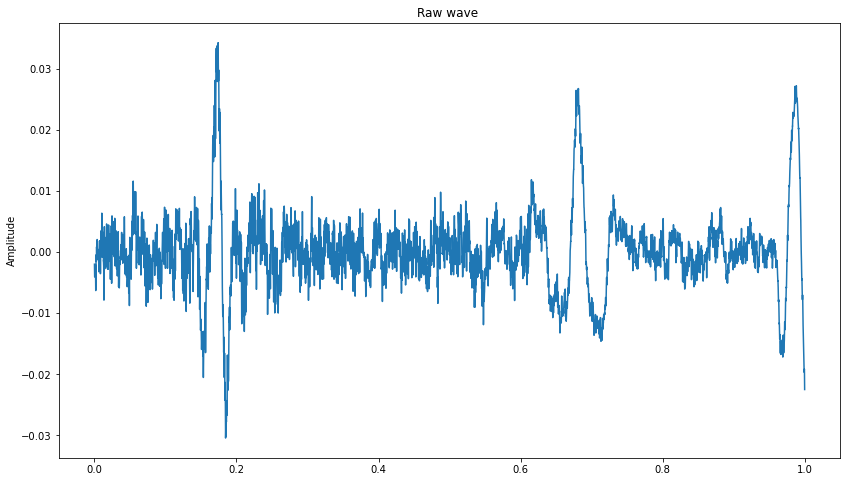

In [4]:
data = load_audio_file("111_1b2_Tc_sc_Meditron.wav")
plot_time_series(data)

In [5]:
ipd.Audio(data, rate=16000)

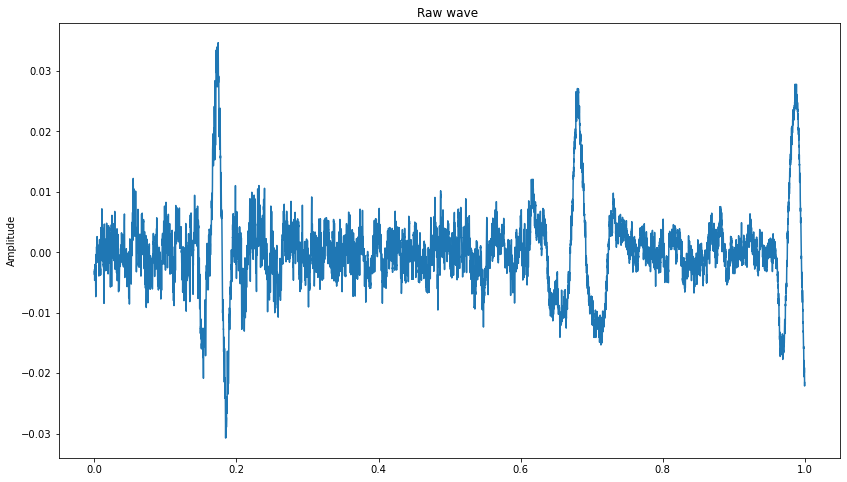

In [9]:
# Adding white noise 
wn = np.random.randn(len(data))
data_wn = data + 0.0005*wn
plot_time_series(data_wn)
# We limited the amplitude of the noise so we can still hear the word even with the noise, 
#which is the objective
ipd.Audio(data_wn, rate=16000)

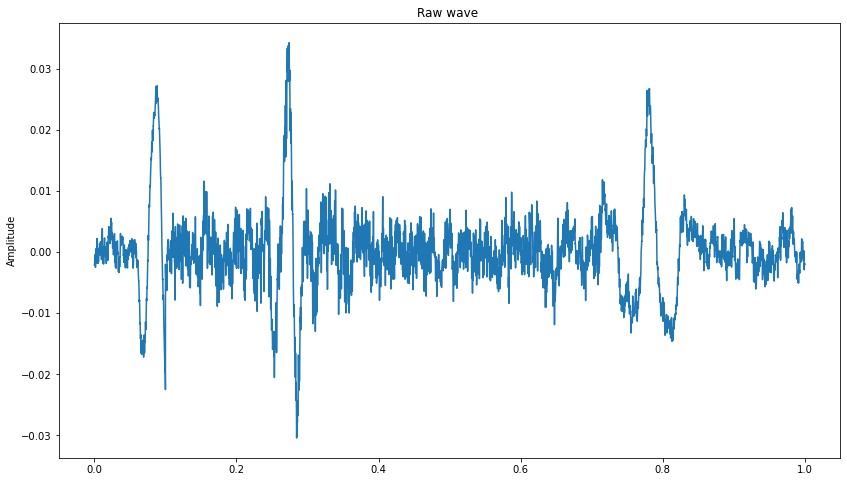

In [10]:
# Shifting the sound
data_roll = np.roll(data, 1600)
plot_time_series(data_roll)
ipd.Audio(data_roll, rate=16000)

This makes the sound deeper but we can still hear 'off' 


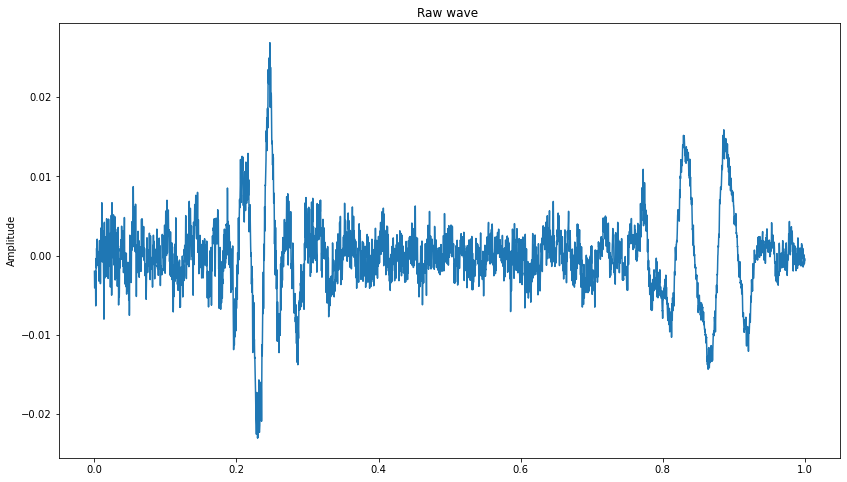

Higher frequencies  


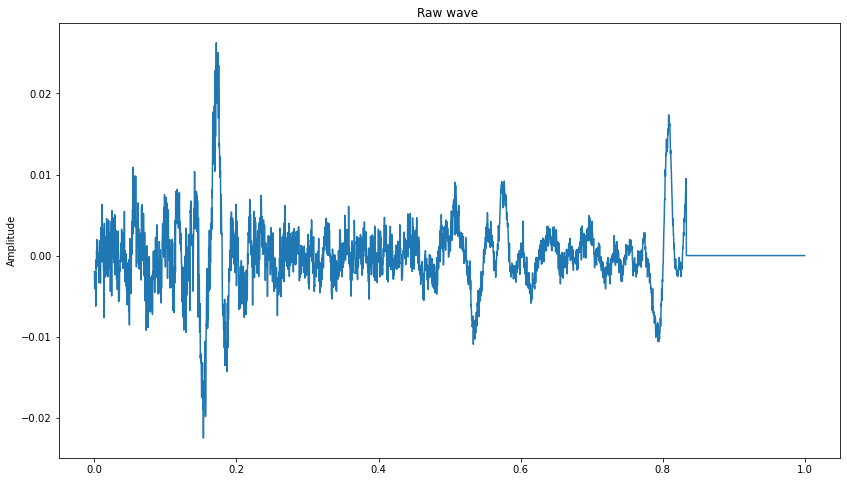

In [11]:
def stretch(data, rate=1):
    input_length = 16000
    data = librosa.effects.time_stretch(data, rate)
    if len(data)>input_length:
        data = data[:input_length]
    else:
        data = np.pad(data, (0, max(0, input_length - len(data))), "constant")

    return data


data_stretch =stretch(data, 0.8)
print("This makes the sound deeper but we can still hear 'off' ")
plot_time_series(data_stretch)
ipd.Audio(data_stretch, rate=16000)

data_stretch =stretch(data, 1.2)
print("Higher frequencies  ")
plot_time_series(data_stretch)
ipd.Audio(data_stretch, rate=16000)